In [5]:
import geopandas as gpd
import numpy as np
import json

In [2]:
df = gpd.read_file('./PatrimonioBienesTangibles/Material.shp')
df = df.to_crs(crs=4326)
#df = df.dropna(subset=['GRUPO_PATR'])
#df = df.reset_index()
#df = df.drop(['index'], axis=1)
df

,OBJECTID,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,SHAPE_Leng,MpAltitud,Restriccio,COD_DANE,DEPARTAMEN,MUNICIPIO,GRUPO_PATR,NUM_BIENES,Shape_Le_1,Shape_Area,geometry
0,1,91540,Puerto Nariño,1455.583518,Decreto No. 0106 de 1984,1,217528.497970,100,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,217528.497970,1.455584e+09,"POLYGON ((-70.34652 -3.36178, -70.36550 -3.689..."
1,2,91001,Leticia,6009.645080,Decreto No. 0352 de 1964,1,427096.068551,82,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,427096.068551,6.009645e+09,"POLYGON ((-69.91858 -3.00258, -69.91805 -3.002..."
2,3,91798,Tarapacá,9038.960497,NaN,3,570656.867696,100,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,570656.867696,9.038960e+09,"POLYGON ((-69.53517 -2.00257, -69.53507 -2.002..."
3,4,91263,El Encanto,10504.356901,NaN,3,890227.139552,158,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,890227.139552,1.050436e+10,"POLYGON ((-73.48496 -1.50266, -73.48495 -1.502..."
4,5,91536,Puerto Arica,13468.959797,Ordenanza No. 023 de 1997,3,948242.198199,150,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,948242.198199,1.347388e+10,"POLYGON ((-71.15051 -2.33291, -71.15140 -2.332..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1122,44430,Maicao,1767.249213,Decreto No. 0044 de 1956,1,302640.664517,51,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,302640.664517,1.767249e+09,"POLYGON ((-72.00289 11.69446, -72.00253 11.694..."
1118,1123,44560,Manaure,1616.125601,Ordenanza No. 15 de 1973,1,226018.369514,3,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,226018.369514,1.616126e+09,"POLYGON ((-72.35449 11.82666, -72.35385 11.825..."
1119,1124,44847,Uribia,7863.727320,NaN,1,665064.084415,23,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,0.0,665064.084415,7.863727e+09,"POLYGON ((-71.66349 12.45935, -71.66312 12.459..."
1120,1125,88001,San Andrés,27.398981,NaN,1,39645.380420,20,“No es apropiada su aplicación para la ubicaci...,88001,SAN ANDRÉS PROVIDENCIA Y SANTA CATALINA,SAN ANDRÉS. LA LOMA,PATRIMONIO MATERIAL,2.0,39645.380420,2.739898e+07,"POLYGON ((-81.70411 12.59489, -81.70404 12.594..."


In [3]:
print(df['geometry'].unique())

<GeometryArray>
[<POLYGON ((-70.347 -3.362, -70.366 -3.69, -70.365 -3.69, -70.365 -3.69, -70....>,
 <POLYGON ((-69.919 -3.003, -69.918 -3.003, -69.918 -3.003, -69.917 -3.003, -...>,
 <POLYGON ((-69.535 -2.003, -69.535 -2.003, -69.678 -2.8, -69.714 -3.003, -69...>,
 <POLYGON ((-73.485 -1.503, -73.485 -1.503, -73.484 -1.503, -73.479 -1.503, -...>,
 <POLYGON ((-71.151 -2.333, -71.151 -2.332, -71.152 -2.332, -71.153 -2.332, -...>,
 <POLYGON ((-73.739 -1.224, -73.739 -1.223, -73.739 -1.223, -73.739 -1.223, -...>,
 <POLYGON ((-70.494 -0.388, -70.491 -0.39, -70.489 -0.392, -70.486 -0.394, -7...>,
 <POLYGON ((-73.724 -0.38, -73.723 -0.38, -73.723 -0.38, -73.722 -0.38, -73.7...>,
 <POLYGON ((-72.017 -0.264, -72.013 -0.265, -72.011 -0.267, -72.009 -0.27, -7...>,
 <POLYGON ((-70.047 -0.116, -70.046 -0.116, -70.046 -0.116, -70.046 -0.116, -...>,
 ...
 <POLYGON ((-72.659 11.168, -72.658 11.168, -72.658 11.167, -72.657 11.166, -...>,
 <POLYGON ((-73.217 11.33, -73.216 11.33, -73.216 11.33, -73.216 1

In [4]:
df['geometry'].to_csv('out.csv')  

/home/alejandro/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


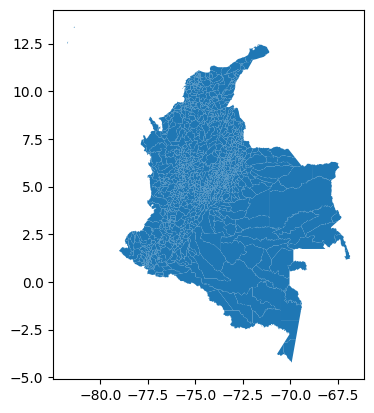

In [13]:
df.plot();

In [22]:

datajson = []
for i in range(0,len(df)):
    
    area = df["geometry"][i].exterior.coords
    arr = []
    
    for j in range(0,len(area)):
        arr.append(area[j][1])
        arr.append(area[j][0])
        arr.append(0)
        
    datajson.append(arr)


In [23]:
save_file3 = open("RiesgoInundacion.json", "w") 
json.dump(datajson, save_file3, indent = 6) 
save_file3.close() 

In [15]:
import fiona

In [19]:
layers = fiona.listlayers('./PatrimonioBienesTangibles/PatrimonioBienesTangibles.gdb')

for layer in layers:
    gdf = gpd.read_file('./PatrimonioBienesTangibles/PatrimonioBienesTangibles.gdb',layer=layer)

In [20]:
gdf

,OBJECTID,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,SHAPE_Leng,MpAltitud,Restriccio,COD_DANE,DEPARTAMENTO,MUNICIPIO,GRUPO_PATRIMONIAL,NUM_BIENES_INMUEBLE,Shape_Length,Shape_Area,geometry
0,1,91540,Puerto Nariño,1455.583518,Decreto No. 0106 de 1984,1,217528.497970,100,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,217528.497970,1.455584e+09,"MULTIPOLYGON (((5294748.315 1186216.201, 52925..."
1,2,91001,Leticia,6009.645080,Decreto No. 0352 de 1964,1,427096.068551,82,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,427096.068551,6.009645e+09,"MULTIPOLYGON (((5342445.115 1225820.782, 53425..."
2,3,91798,Tarapacá,9038.960497,,3,570656.867696,100,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,570656.867696,9.038960e+09,"MULTIPOLYGON (((5385396.578 1336385.588, 53854..."
3,4,91263,El Encanto,10504.356901,,3,890227.139552,158,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,890227.139552,1.050436e+10,"MULTIPOLYGON (((4946075.390 1392020.540, 49460..."
4,5,91536,Puerto Arica,13468.959797,Ordenanza No. 023 de 1997,3,948242.198199,150,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,948242.198199,1.347388e+10,"MULTIPOLYGON (((5205586.571 1300159.591, 52054..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1122,44430,Maicao,1767.249213,Decreto No. 0044 de 1956,1,302640.664517,51,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,302640.664517,1.767249e+09,"MULTIPOLYGON (((5108626.681 2850491.771, 51086..."
1118,1123,44560,Manaure,1616.125601,Ordenanza No. 15 de 1973,1,226018.369514,3,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,226018.369514,1.616126e+09,"MULTIPOLYGON (((5070287.426 2864994.058, 50703..."
1119,1124,44847,Uribia,7863.727320,,1,665064.084415,23,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,665064.084415,7.863727e+09,"MULTIPOLYGON (((5145194.350 2935212.660, 51452..."
1120,1125,88001,San Andrés,27.398981,,1,39645.380420,20,“No es apropiada su aplicación para la ubicaci...,88001,SAN ANDRÉS PROVIDENCIA Y SANTA CATALINA,SAN ANDRÉS. LA LOMA,PATRIMONIO MATERIAL,2.0,39645.380420,2.739898e+07,"MULTIPOLYGON (((4051657.821 2965625.914, 40516..."


In [21]:
gdf.sort_values('Shape_Area')

,OBJECTID,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,SHAPE_Leng,MpAltitud,Restriccio,COD_DANE,DEPARTAMENTO,MUNICIPIO,GRUPO_PATRIMONIAL,NUM_BIENES_INMUEBLE,Shape_Length,Shape_Area,geometry
678,681,05631,Sabaneta,15.732852,Ordenanza No. 7 de 1967,1,1.824434e+04,1600,“No es apropiada su aplicación para la ubicaci...,05631,ANTIOQUIA,SABANETA,PATRIMONIO MATERIAL,1.0,1.824434e+04,1.573285e+07,"MULTIPOLYGON (((4711815.201 2239708.369, 47118..."
689,692,05360,Itagüí,19.507853,,1,2.286600e+04,1578,“No es apropiada su aplicación para la ubicaci...,05360,ANTIOQUIA,ITAGÜÍ,PATRIMONIO MATERIAL,1.0,2.286600e+04,1.950785e+07,"MULTIPOLYGON (((4712340.707 2243821.828, 47123..."
759,762,68522,Palmar,19.659740,,1,2.983888e+04,870,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,2.983888e+04,1.965974e+07,"MULTIPOLYGON (((4966902.112 2283702.799, 49669..."
1121,1126,88564,Providencia y Santa Catalina,22.489787,Decreto No. 2964 Bis de 1953,1,3.203866e+04,5,“No es apropiada su aplicación para la ubicaci...,88564,SAN ANDRÉS PROVIDENCIA Y SANTA CATALINA,PROVIDENCIA,PATRIMONIO MATERIAL,1.0,3.203866e+04,2.248979e+07,"MULTIPOLYGON (((4091556.810 3052708.439, 40915..."
619,622,15114,Busbanzá,25.301193,,1,2.261148e+04,2500,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,2.261148e+04,2.530119e+07,"MULTIPOLYGON (((5014113.145 2207148.332, 50141..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,381,50568,Puerto Gaitán,17199.254178,Ordenanza No. 39 de 1969,1,8.631908e+05,149,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,8.631908e+05,1.719925e+10,"MULTIPOLYGON (((5213144.688 2080575.804, 52131..."
692,695,99524,La Primavera,18352.739633,Decreto No. 0676 de 1987,1,9.023730e+05,100,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,9.023730e+05,1.835274e+10,"MULTIPOLYGON (((5434743.157 2245618.804, 54348..."
174,176,18753,San Vicente Del Caguán,17445.009194,Decreto No. 0963 de 1950,1,1.177824e+06,250,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,1.177824e+06,2.017030e+10,"MULTIPOLYGON (((4809995.954 1877401.179, 48100..."
40,41,18756,Solano,42233.428594,Ordenanza No. 03 de 1985,1,2.221569e+06,200,“No es apropiada su aplicación para la ubicaci...,NaN,NaN,NaN,NaN,NaN,2.221569e+06,4.223343e+10,"MULTIPOLYGON (((5031404.829 1689269.385, 50316..."


/home/alejandro/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

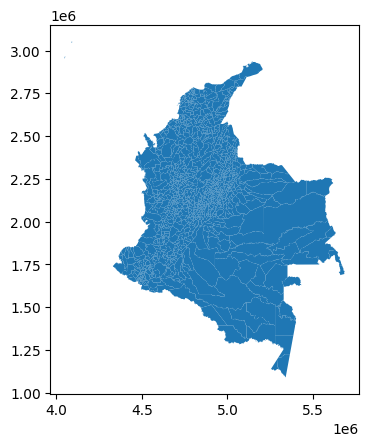

In [22]:
gdf.plot()